## **# Clustering California Housing Data**

**Business Goal:** By grouping neighborhoods according to different characteristics included in the dataset, this project aims to obtain insights into the California housing market. To help real estate stakeholders, urban planners, and policymakers make decisions, the main goal is to identify trends and commonalities among neighborhoods. By identifying distinct neighborhoods with comparable housing characteristics, clustering can yield important insights for resource allocation, investment strategies, and targeted interventions.

The dataset comprises essential features such as longitude, latitude, housing median age, total rooms, total bedrooms, population, households, median income, median house value, and ocean proximity. Each row in the dataset represents a specific neighborhood in California.
dataset link:https://www.kaggle.com/datasets/camnugent/california-housing-prices

**Load Data:** Load the dataset from the CSV file into a DataFrame using Pandas.

In [ ]:
import pandas as pd
# Load data from CSV
file_path = "housing.csv"
housing_data = pd.read_csv(file_path)
housing_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,INLAND
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,INLAND
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,INLAND
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,INLAND


Clustering on California housing prices can depend on various factors, including:

**Location:** One of the primary factors influencing housing prices is the location of the property. Different neighborhoods or regions may have distinct characteristics such as proximity to urban centers, amenities, schools, and transportation options.

**Property Characteristics:** The specific attributes of the property, such as its size, number of bedrooms and bathrooms, square footage, and overall condition, play a crucial role in determining its price. Properties with more desirable features or upgrades may command higher prices.

**Market Trends:** Housing prices are also influenced by broader market trends, including supply and demand dynamics, interest rates, economic conditions, and local regulations. Changes in market conditions can lead to fluctuations in housing prices over time.

**Demographic Factors:** Demographic factors such as population growth, income levels, and demographic shifts can affect housing demand and, consequently, prices in certain areas.

**Neighborhood Characteristics:** Factors such as crime rates, school quality, access to amenities like parks and shopping centers, and the overall desirability of the neighborhood can impact housing prices.

**Natural Features:** Proximity to natural features such as beaches, mountains, or waterfronts can also influence housing prices, with properties offering scenic views or access to outdoor recreation commanding premium prices.

**Historical Data:** Analyzing historical housing data and patterns can provide insights into past trends and help predict future price movements, guiding clustering algorithms to identify similar properties based on past pricing trends.

In [ ]:
# Display basic statistics and information
print(housing_data.describe())
print(housing_data.info())

          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.00000

**Handle Missing Values and performing one-hot encoding**:

To handle missing values in a dataset, we first identify columns with missing data and decide on an appropriate strategy, such as imputation or dropping. Imputation involves filling missing values with statistical measures like mean or median, while dropping removes rows or columns with missing data. One-hot encoding is a technique used to convert categorical variables into binary columns, making them suitable for machine learning algorithms. This process involves identifying categorical features, encoding them using methods like Pandas' get_dummies(), and merging the encoded features with the original dataset. In Python, these tasks can be accomplished efficiently using libraries like Pandas.






In [ ]:
# Handle missing values (if any)
housing_data.dropna(inplace=True)

# Encode categorical feature 'ocean_proximity'
housing_data = pd.get_dummies(housing_data, columns=['ocean_proximity'], drop_first=True)


In [ ]:
housing_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,0,0,1,0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,0,0,1,0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,0,0,1,0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,0,0,1,0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,1,0,0,0
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,1,0,0,0
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,1,0,0,0
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,1,0,0,0


we are performing K-means clustering on the housing data using the scikit-learn library. The variable k1 represents the number of clusters we want to form, which is set to 3 in this case. We initialize the KMeans algorithm with n_clusters=k1 and a random seed for reproducibility. The fit_predict() method is then used to fit the model to the data and predict cluster labels for each data point. These cluster labels are assigned to a new column named 'cluster1' in the housing_data DataFrame, representing the cluster assignment for each data point. This process partitions the data into three distinct clusters based on their features.

In [ ]:
from sklearn.cluster import KMeans

# Choose the number of clusters (K)
k1 = 3

# Apply K-means clustering
kmeans1 = KMeans(n_clusters=k1, random_state=42)
housing_data['cluster1'] = kmeans1.fit_predict(housing_data)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


This generates a scatter plot to visualize the clusters formed by K-means clustering. It plots the latitude and longitude coordinates of the housing data points, with each point colored according to its assigned cluster. The color mapping is defined by the 'viridis' colormap, which represents different clusters with distinct colors. The title of the plot indicates the clustering method used (K-means) and the number of clusters (K) employed in Method 1. The x-axis represents longitude, while the y-axis represents latitude, providing a geographical perspective of the data distribution. The plot aids in understanding the spatial distribution of clusters and identifying any geographical patterns within the dataset.







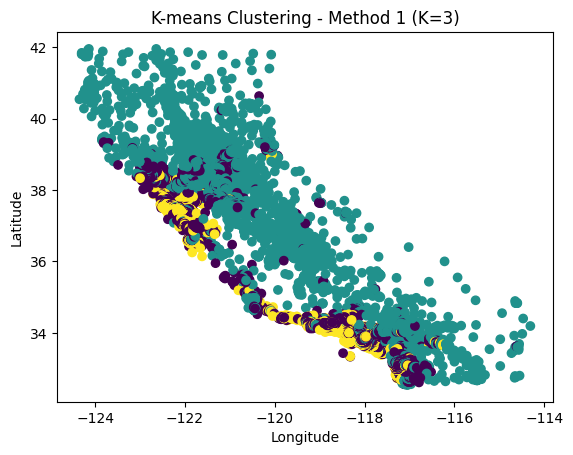

In [ ]:
import matplotlib.pyplot as plt
# Scatter plot for clusters
plt.scatter(housing_data['longitude'], housing_data['latitude'], c=housing_data['cluster1'], cmap='viridis')
plt.title(f'K-means Clustering - Method 1 (K={k1})')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [ ]:
#kmeans
# Choose another number of clusters (K)
k2 = 4

# Apply K-means clustering
kmeans2 = KMeans(n_clusters=k2, random_state=42)
housing_data['cluster2'] = kmeans2.fit_predict(housing_data)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


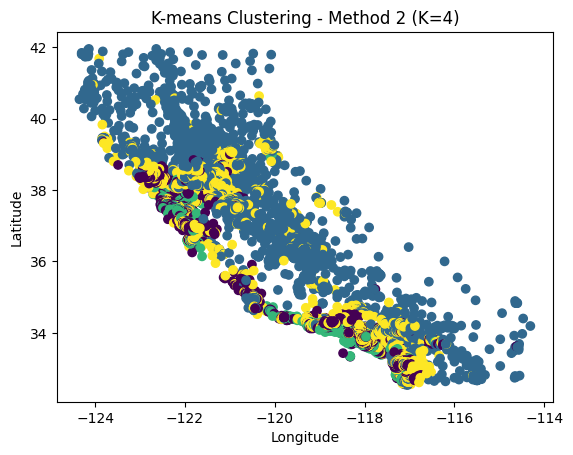

In [ ]:
# Scatter plot for clusters
plt.scatter(housing_data['longitude'], housing_data['latitude'], c=housing_data['cluster2'], cmap='viridis')
plt.title(f'K-means Clustering - Method 2 (K={k2})')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [ ]:
# K-means clustering
kmeans_model = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans_model.fit_predict(housing_data)
kmeans_model

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [ ]:
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score, completeness_score
# Mini-Batch K-means clustering
minibatch_kmeans_model = MiniBatchKMeans(n_clusters=3, random_state=42, batch_size=100)
minibatch_kmeans_labels = minibatch_kmeans_model.fit_predict(housing_data)
minibatch_kmeans_model

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


MiniBatchKMeans(batch_size=100, n_clusters=3, random_state=42)

In [ ]:

# Evaluate clustering performance using metrics
silhouette_score_kmeans = silhouette_score(housing_data, kmeans_labels)
silhouette_score_minibatch = silhouette_score(housing_data, minibatch_kmeans_labels)

davies_bouldin_score_kmeans = davies_bouldin_score(housing_data, kmeans_labels)
davies_bouldin_score_minibatch = davies_bouldin_score(housing_data, minibatch_kmeans_labels)


In [ ]:
# Print clustering metrics
print("K-means Silhouette Score:", silhouette_score_kmeans)
print("Mini-Batch K-means Silhouette Score:", silhouette_score_minibatch)
print("\nK-means Davies Bouldin Score:", davies_bouldin_score_kmeans)
print("Mini-Batch K-means Davies Bouldin Score:", davies_bouldin_score_minibatch)


K-means Silhouette Score: 0.5683423192658962
Mini-Batch K-means Silhouette Score: 0.5710071337039648

K-means Davies Bouldin Score: 0.538361948041011
Mini-Batch K-means Davies Bouldin Score: 0.5341729778933509


we are performing clustering using three different methods: **regular K-means, mini-batch K-means, and K-means++ initialization**. Each method is applied to the housing dataset, and the resulting cluster labels are stored in separate columns within the dataset. These clustering techniques aim to partition the data into three distinct groups based on the features provided in the housing dataset.






In [ ]:
from sklearn.cluster import KMeans, MiniBatchKMeans

# Regular K-means
kmeans_regular = KMeans(n_clusters=3, random_state=42)
kmeans_regular.fit(housing_data)
housing_data['cluster_regular'] = kmeans_regular.labels_

# Mini-Batch K-means
kmeans_mini_batch = MiniBatchKMeans(n_clusters=3, random_state=42)
kmeans_mini_batch.fit(housing_data)
housing_data['cluster_mini_batch'] = kmeans_mini_batch.labels_

# K-means++ Initialization
kmeans_plus_plus = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans_plus_plus.fit(housing_data)
housing_data['cluster_kmeans++'] = kmeans_plus_plus.labels_


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



This code snippet utilizes the matplotlib and seaborn libraries to visualize the clusters formed by the regular K-means clustering algorithm. It creates a scatter plot where the x-axis represents the longitude and the y-axis represents the latitude of the housing data points. Each data point is colored according to its assigned cluster, providing a visual representation of the clustering results.



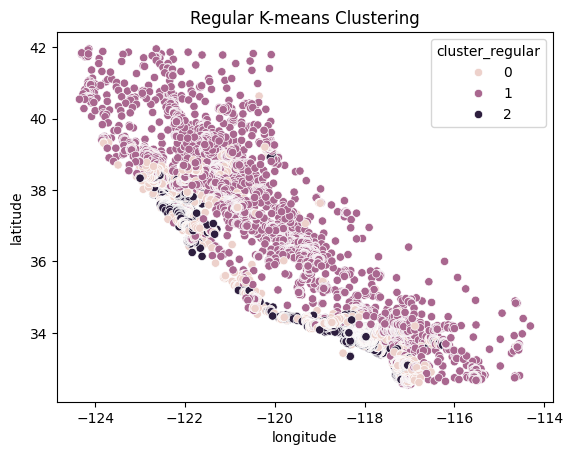

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the clusters
sns.scatterplot(x='longitude', y='latitude', hue='cluster_regular', data=housing_data)
plt.title('Regular K-means Clustering')
plt.show()

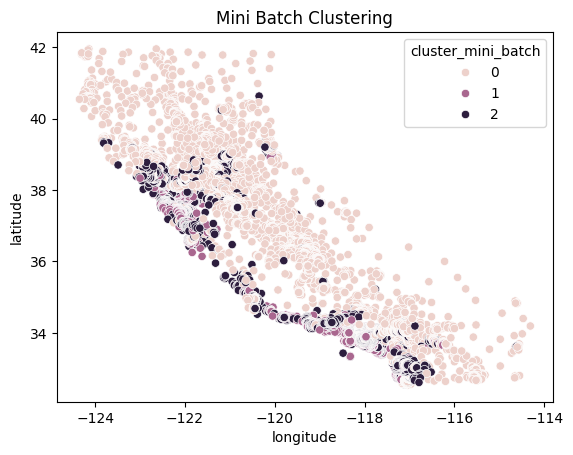

In [ ]:
sns.scatterplot(x='longitude', y='latitude', hue='cluster_mini_batch', data=housing_data)
plt.title('Mini Batch Clustering')
plt.show()

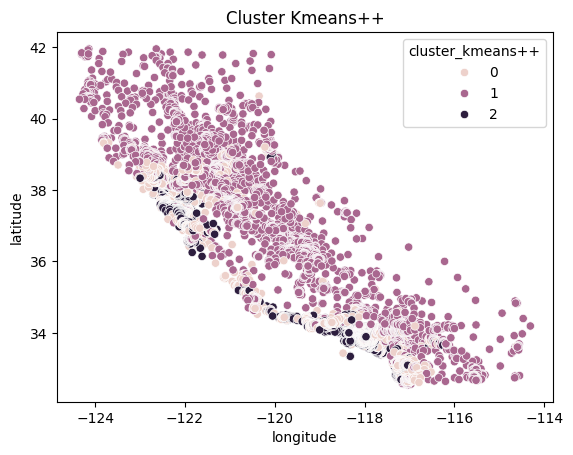

In [ ]:
sns.scatterplot(x='longitude', y='latitude', hue='cluster_kmeans++', data=housing_data)
plt.title('Cluster Kmeans++')
plt.show()

**Gaussian Mixture Model (GMM) clustering**

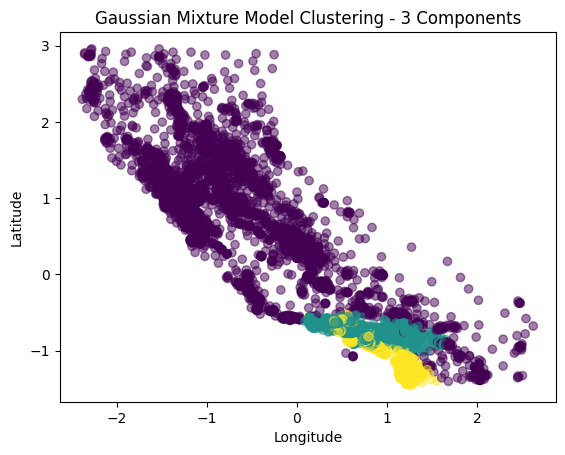

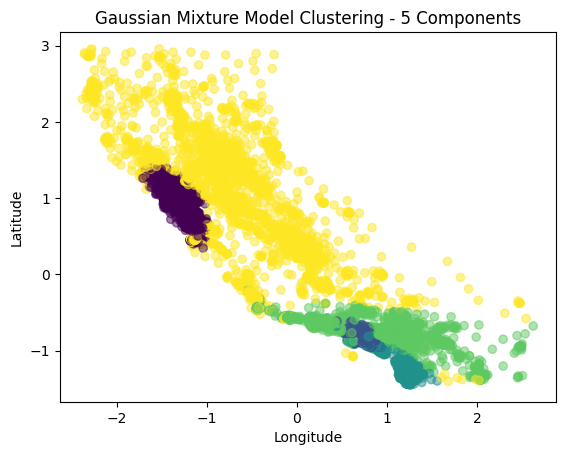

In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

features = housing_data[['longitude', 'latitude', 'median_income']]

# Standardize the features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)
# Function to perform GMM clustering and visualize the clusters
def gmm_clustering(features, n_components):
    gmm = GaussianMixture(n_components=n_components, random_state=42)

    # Fit the model
    gmm.fit(features)

    # Predict cluster labels
    labels = gmm.predict(features)

    # Visualize the clusters
    plt.scatter(features[:, 0], features[:, 1], c=labels, cmap='viridis', alpha=0.5)
    plt.title(f'Gaussian Mixture Model Clustering - {n_components} Components')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.show()

# Perform GMM clustering with different number of components and visualize the clusters
gmm_clustering(features_standardized, n_components=3)
gmm_clustering(features_standardized, n_components=5)
